In [11]:
from __future__ import division
%matplotlib notebook 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_mldata
import scipy.optimize as spopt

# L1 vs L2

## Outliers

The outlier subsection is basically taken from http://www.pyrunner.com/weblog/2016/05/26/compressed-sensing-python/

Optimization terminated successfully.
         Current function value: 0.802252
         Iterations: 51
         Function evaluations: 96
Optimization terminated successfully.
         Current function value: 0.079387
         Iterations: 46
         Function evaluations: 90


<IPython.core.display.Javascript object>


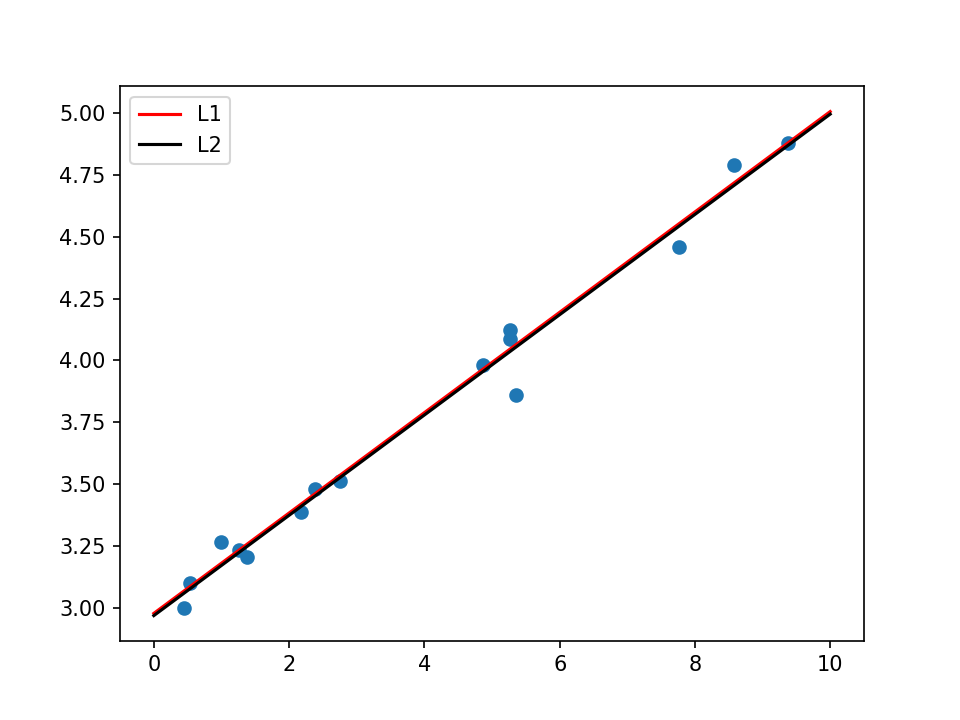

In [12]:
# generate some data with noise
x = np.sort(np.random.uniform(0, 10, 15))
y = 3 + 0.2 * x + 0.1 * np.random.randn(len(x))
# find L1 line fit
l1_fit = lambda x0, x, y: np.sum(np.abs(x0[0] * x + x0[1] - y))
xopt1 = spopt.fmin(func=l1_fit, x0=[1, 1], args=(x, y))

# find L2 line fit
l2_fit = lambda x0, x, y: np.sum(np.power(x0[0] * x + x0[1] - y, 2))
xopt2 = spopt.fmin(func=l2_fit, x0=[1, 1], args=(x, y))
plt.figure()
plt.plot(x,y,'o')
plt.plot([0,10],np.polyval(xopt1,[0,10]),'r',label='L1')
plt.plot([0,10],np.polyval(xopt2,[0,10]),'k',label='L2')
plt.gca().legend()
plt.show()

array([ 0.45044046,  1.54166674,  2.57220759,  2.83093668,  3.31261424,
        3.54165358,  3.78124971,  3.98055799,  4.12770116,  4.20846616,
        6.08977828,  6.77578146,  7.69922779,  8.37768704,  9.48305621])

Optimization terminated successfully.
         Current function value: 7.639328
         Iterations: 58
         Function evaluations: 109
Optimization terminated successfully.
         Current function value: 19.744827
         Iterations: 68
         Function evaluations: 132


<IPython.core.display.Javascript object>


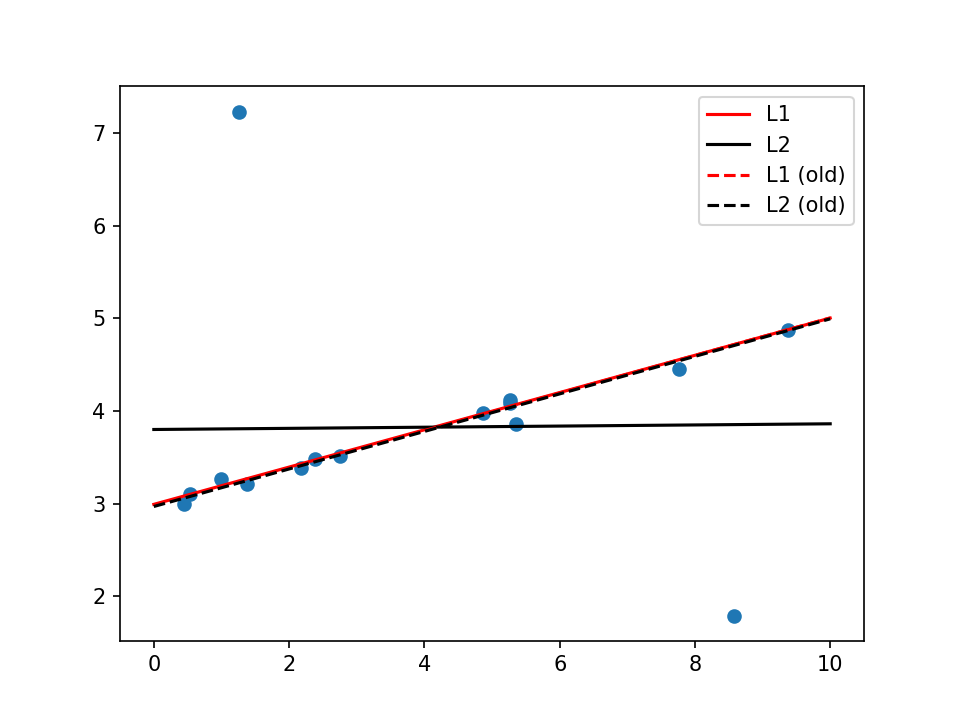

In [13]:
y2 = y.copy()
y2[3] += 4
y2[13] -= 3

# refit the lines
xopt12 = spopt.fmin(func=l1_fit, x0=[1, 1], args=(x, y2))
xopt22 = spopt.fmin(func=l2_fit, x0=[1, 1], args=(x, y2))
plt.figure()
plt.plot(x,y2,'o')
plt.plot([0,10],np.polyval(xopt12,[0,10]),'r',label='L1')
plt.plot([0,10],np.polyval(xopt22,[0,10]),'k',label='L2')
plt.plot([0,10],np.polyval(xopt1,[0,10]),'--r',label='L1 (old)')
plt.plot([0,10],np.polyval(xopt2,[0,10]),'--k',label='L2 (old)')
plt.gca().legend()
plt.show()

## Compressed sensing

In [20]:
n=25
m=30
A=np.random.randn(n,m)

def generate_x_y(num_non_zeros):
    x=np.zeros(m)
    x=np.random.rand(m)
    x[np.random.choice(range(m),m-num_non_zeros,replace=False)]=0    
    y=np.matmul(A,x)
    return x,y

def L1_norm(X):
    return np.abs(X).sum()

def L2_norm(X):
    return (X**2).sum()


<IPython.core.display.Javascript object>


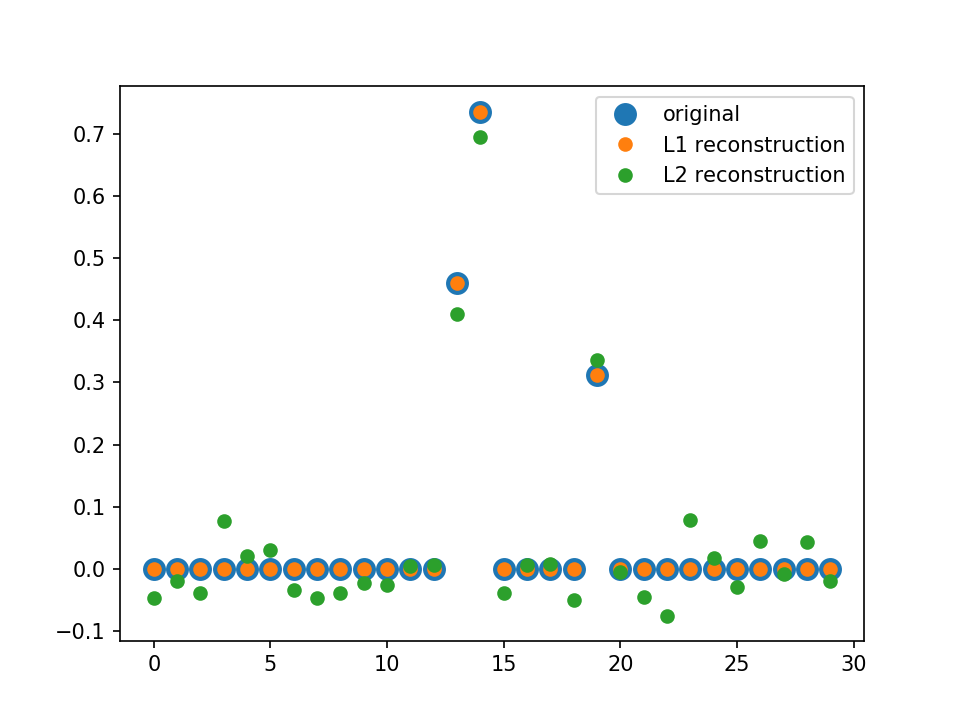

In [15]:
x, y=generate_x_y(3)
r1=spopt.minimize(fun=lambda X: L1_norm(X),x0=0*x,
                  constraints={'type': 'eq',
                               'fun' : lambda Q: np.matmul(A,Q)-y
                              })

r2=spopt.minimize(fun=lambda X: L2_norm(X),x0=0*x,
                  constraints={'type': 'eq',
                               'fun' : lambda Q: np.matmul(A,Q)-y
                              })
plt.figure()
plt.plot(x,'o',label='original',markersize=10)
plt.plot(r1.x,'o',label='L1 reconstruction')
plt.plot(r2.x,'o',label='L2 reconstruction')
plt.gca().legend()
plt.show()

In [10]:
nit=100
q1=np.zeros([m,nit])
q2=np.zeros([m,nit])
nnz=np.arange(1,m+1)
for i in nnz:
    for j in range(nit):
        x, y=generate_x_y(i)
        r1=spopt.minimize(fun=lambda X: L1_norm(X),x0=0*x,
                  constraints={'type': 'eq',
                               'fun' : lambda Q: np.matmul(A,Q)-y
                              })
        r2=spopt.minimize(fun=lambda X: L2_norm(X),x0=0*x,
                      constraints={'type': 'eq',
                                   'fun' : lambda Q: np.matmul(A,Q)-y
                                  })
        q1[i-1,j]=L2_norm(r1.x-x)
        q2[i-1,j]=L2_norm(r2.x-x)
        

In [11]:
plt.figure()
plt.plot(range(1,m+1),q1.mean(axis=1),'-o', label='L1')
plt.plot(range(1,m+1),q2.mean(axis=1),'-o',label='L2')
plt.legend()
plt.gca().set_xlabel('number of non zeros')
plt.gca().set_ylabel('average loss')
plt.show()

<IPython.core.display.Javascript object>

# Hand-writing recognition

<IPython.core.display.Javascript object>


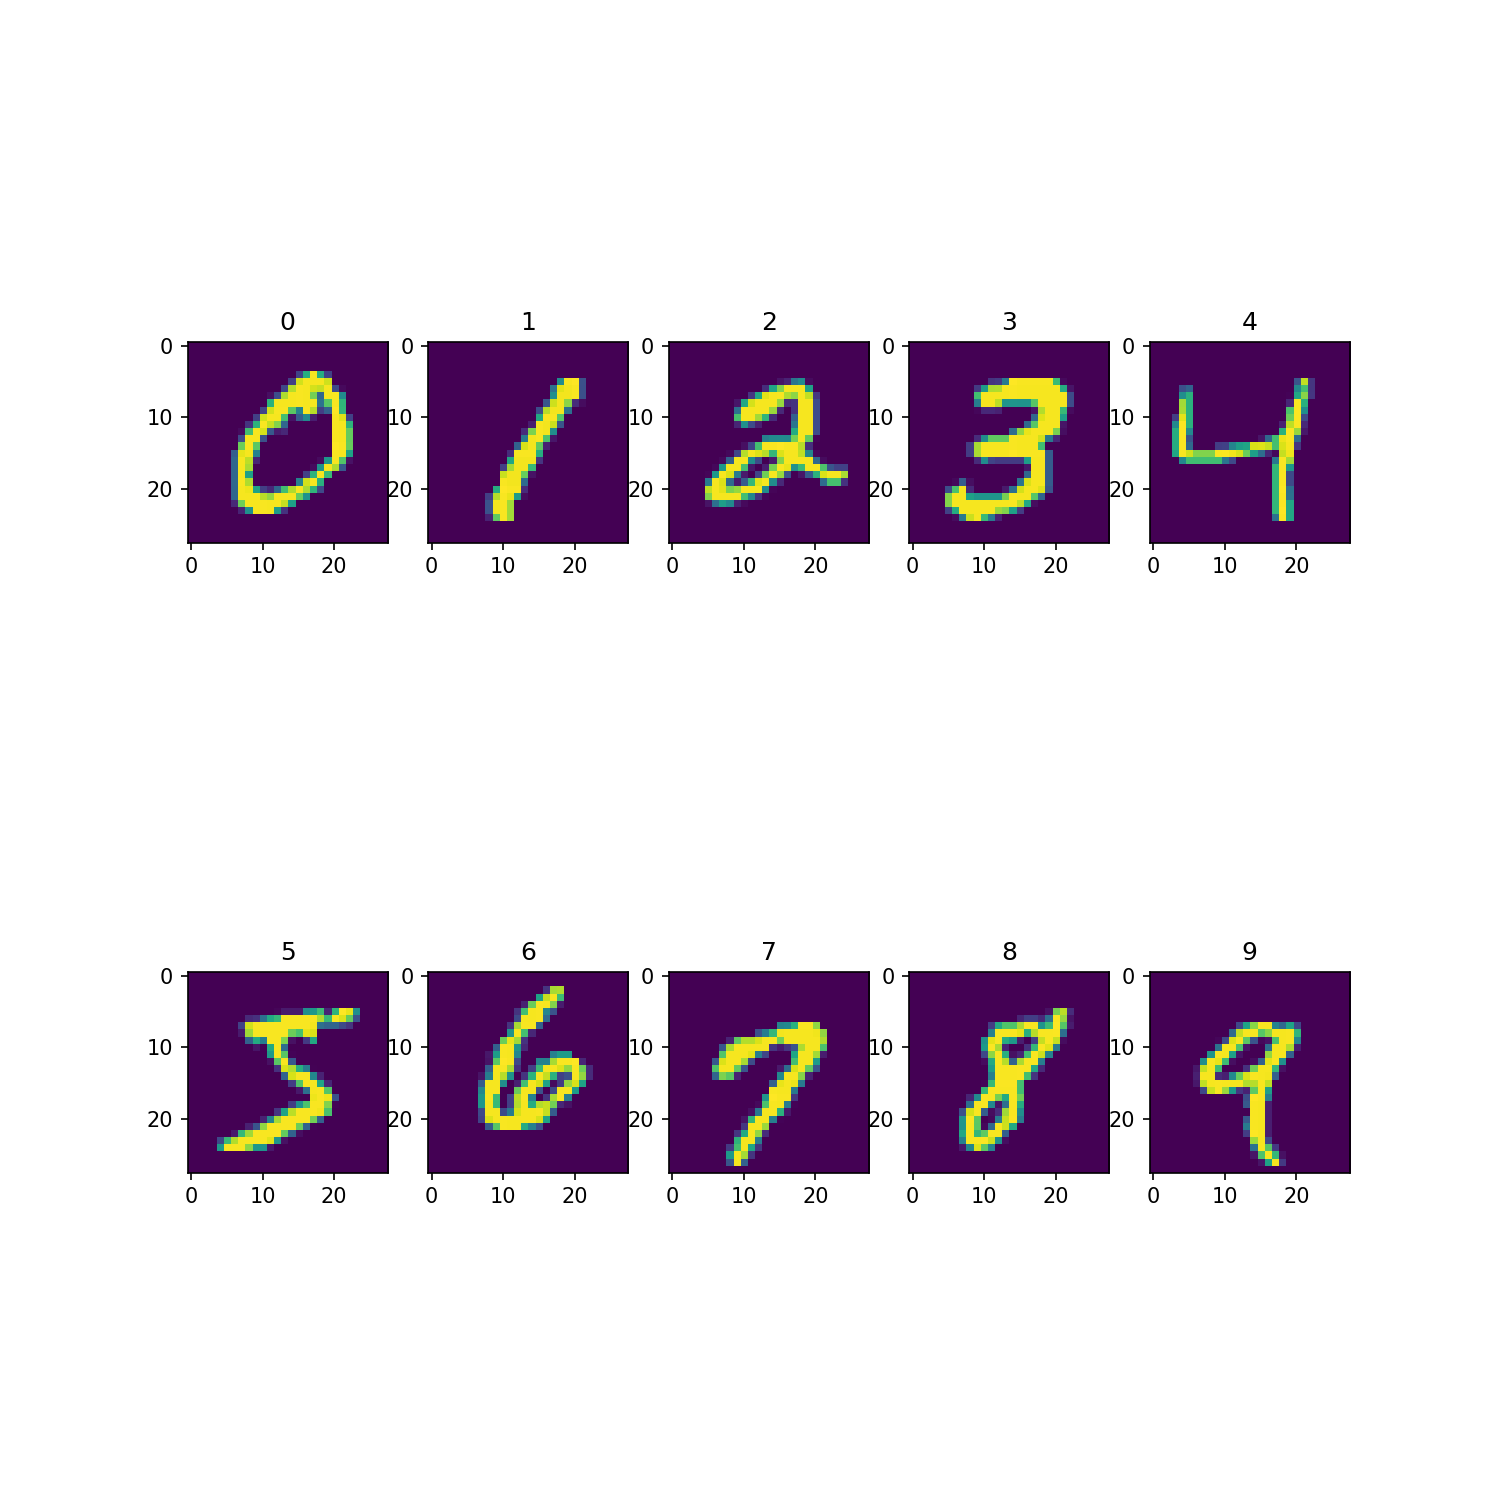

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  51 159 253 159  50   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252
 253 122   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 163 252 252 252 253 252 252  96 189 253 167   

In [42]:
sk_mnist = fetch_mldata('MNIST original', data_home='/Users/Gita/data/sklearn')
inds=np.array([sk_mnist.target==i for i in range(10)]) # a list of the indices for label

f,ax=plt.subplots(2,5,figsize=(10,10))
ax=ax.flatten()
for i in range(10):
    ax[i].imshow(sk_mnist.data[np.argmax(inds[i])].reshape(28,28))
    ax[i].set_title(str(i))
plt.show()

plot two random projections:

In [75]:
np.shape(sk_mnist.data[inds[0]])
np.shape(sk_mnist.data)

(70000, 784)

<IPython.core.display.Javascript object>


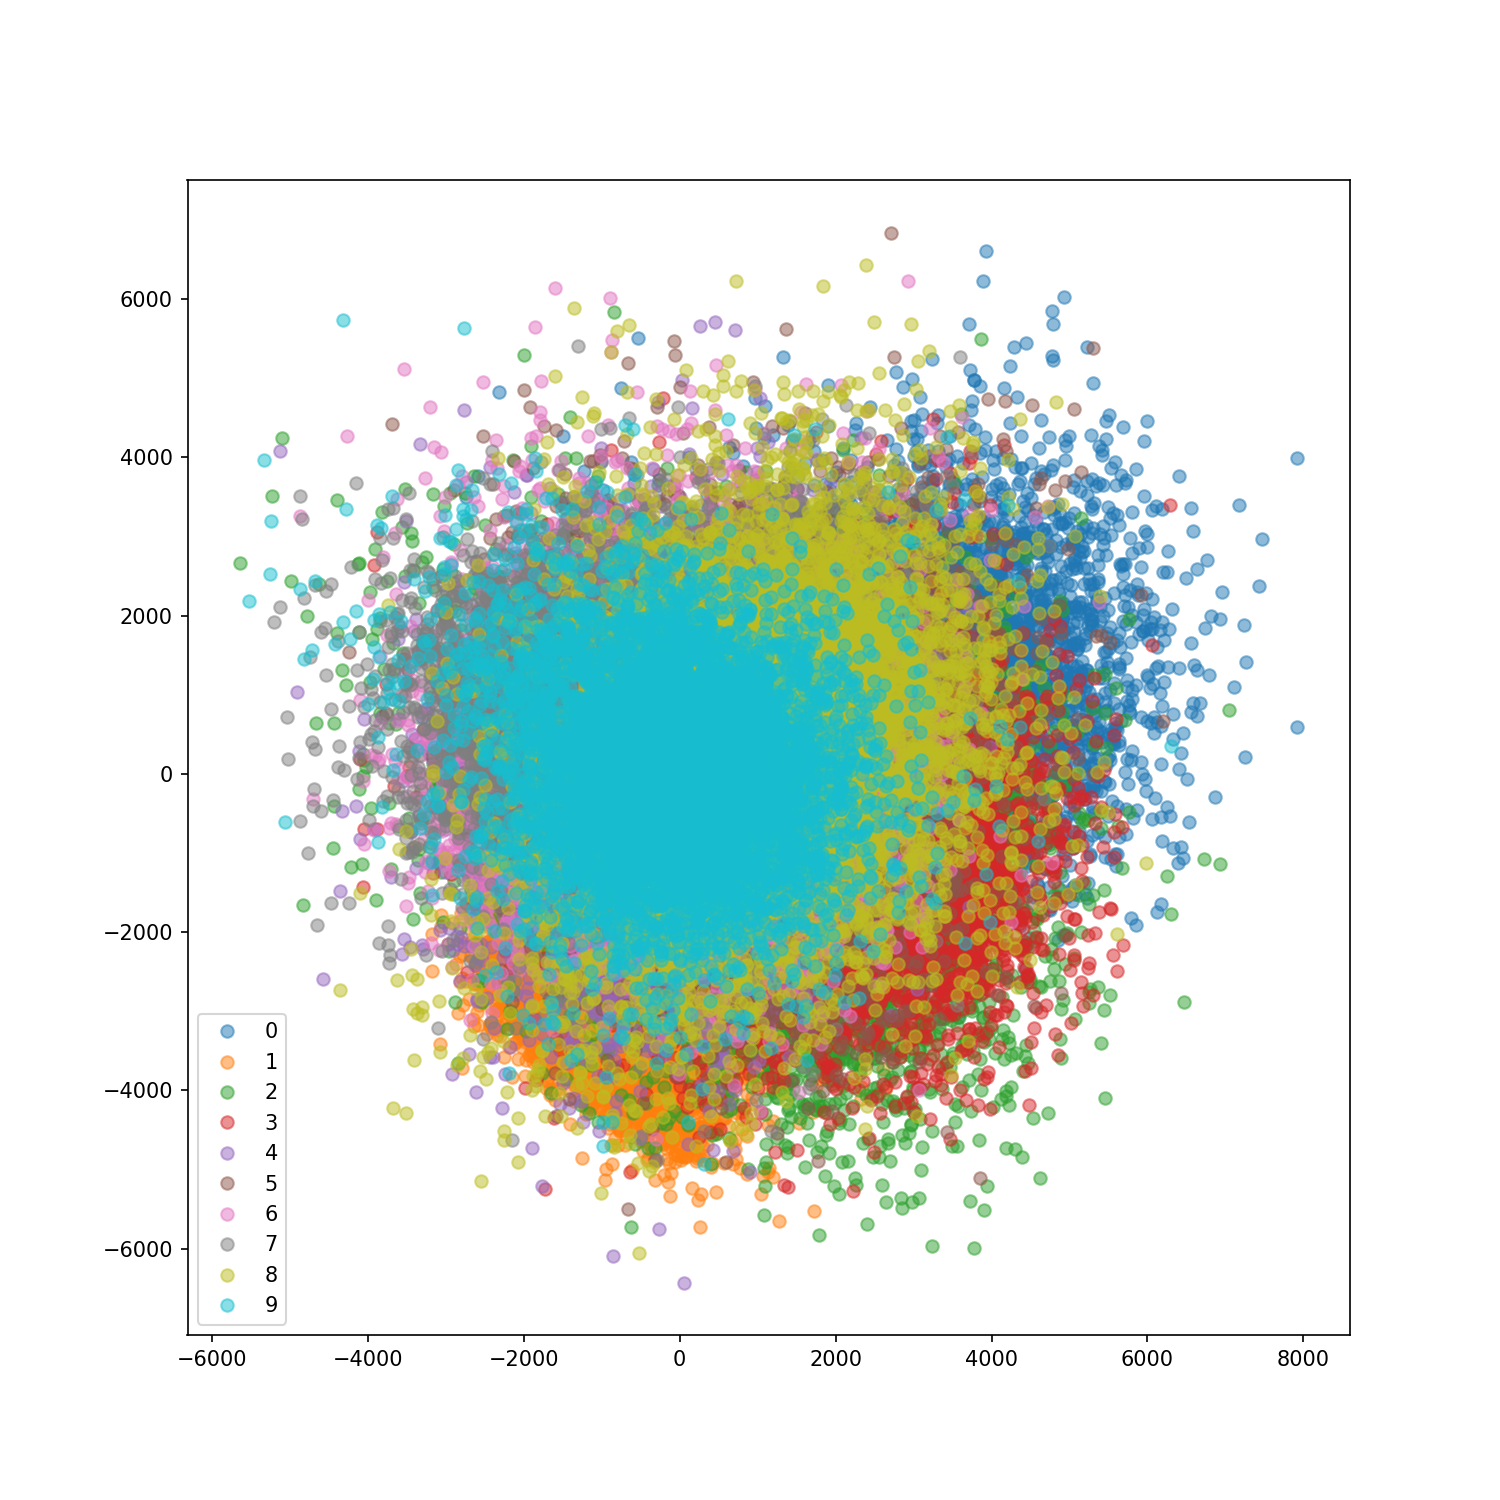

In [38]:
plt.figure(figsize=(10,10))
r1=np.random.randn(28*28)
r2=np.random.randn(28*28)
for i in range(10):
    plt.plot(np.dot(sk_mnist.data[inds[i]],r1),
             np.dot(sk_mnist.data[inds[i]],r2),
             'o', label=str(i), alpha=0.5)
plt.gca().legend()
plt.show()

Plot the two principal components from PCA:

In [50]:
np.shape(sk_mnist_reduced)

(70000, 20)

<IPython.core.display.Javascript object>


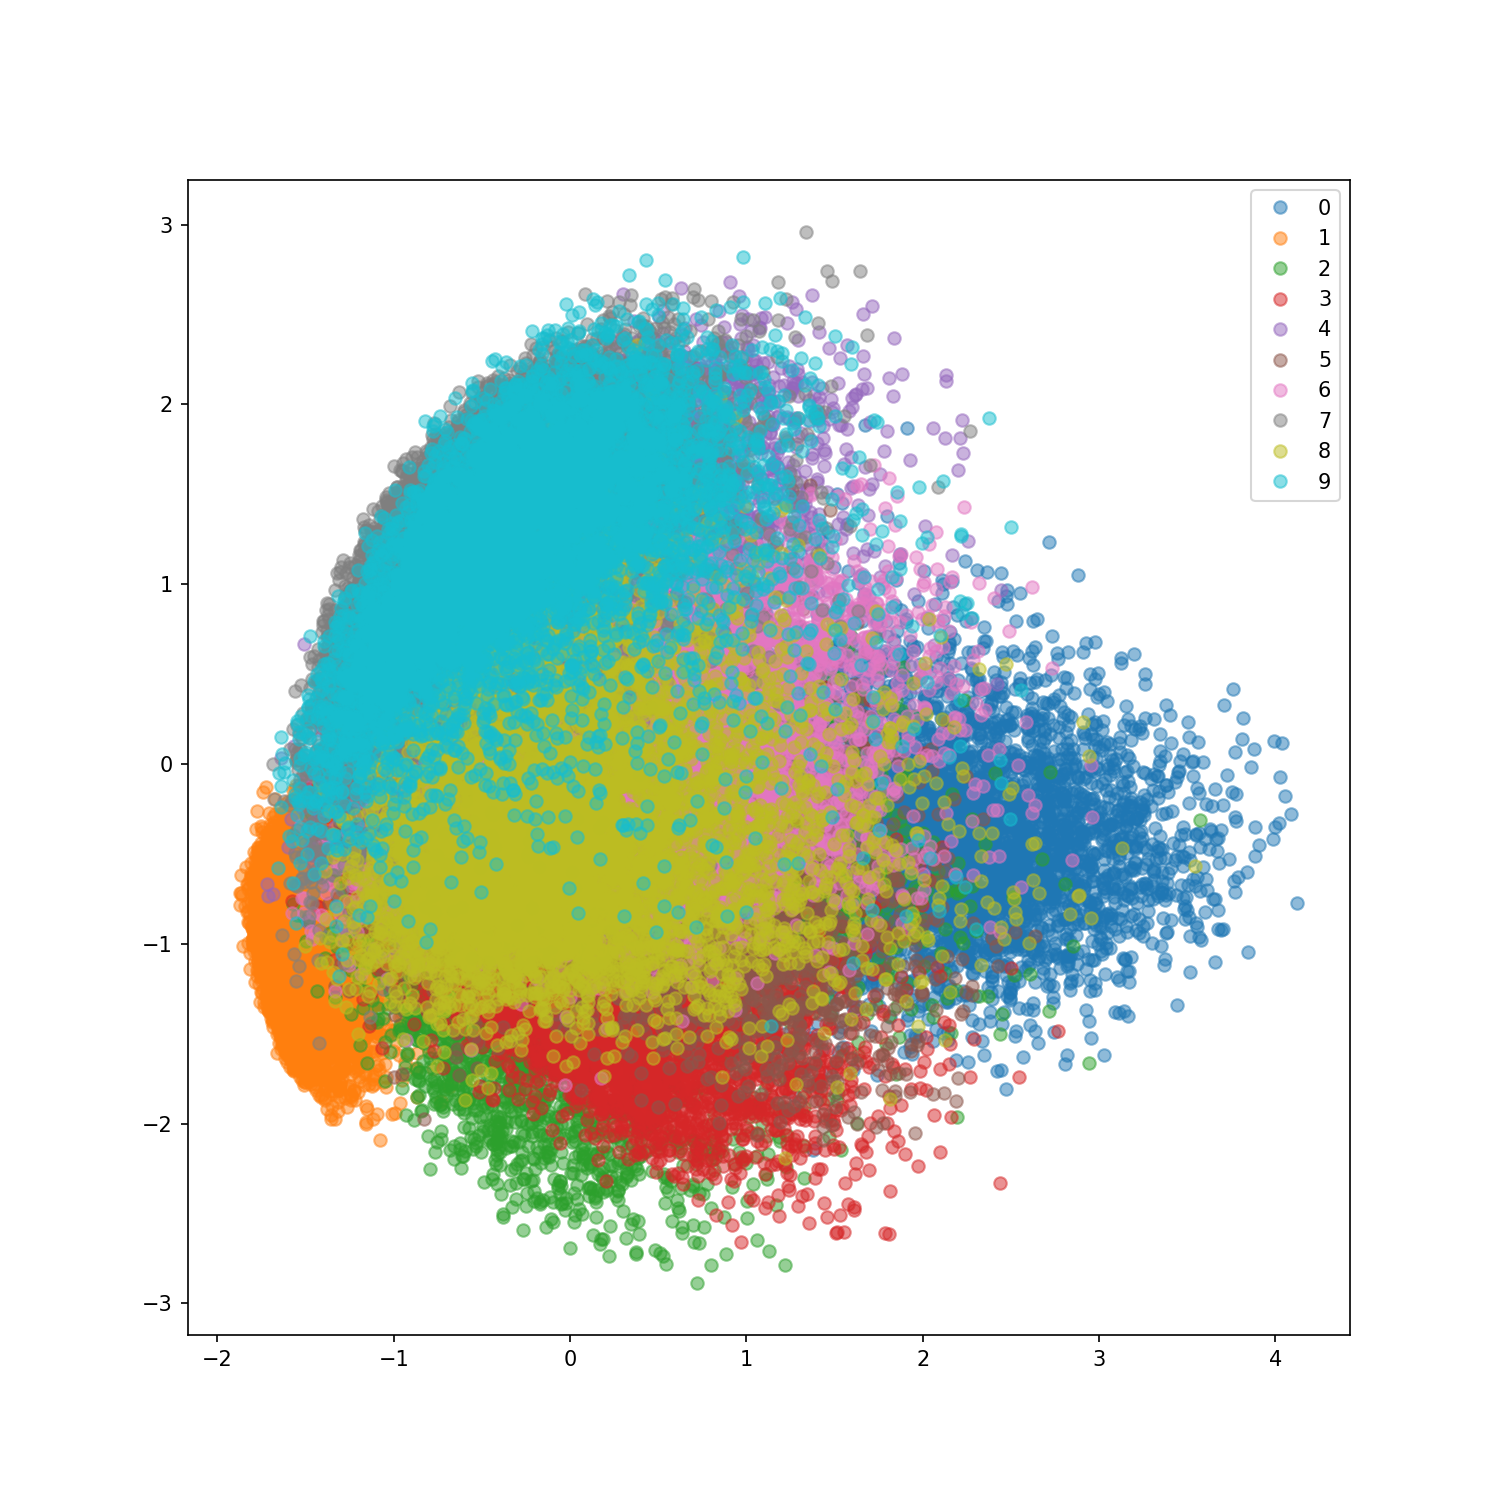

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20, whiten=True)
pca.fit(sk_mnist.data)
sk_mnist_reduced=pca.transform(sk_mnist.data)
plt.figure(figsize=(10,10))
for i in range(10):
    plt.plot(sk_mnist_reduced[inds[i],0],
             sk_mnist_reduced[inds[i],1],
             'o', label=str(i), alpha=0.5)
plt.gca().legend()
plt.show()

Preform KMeans clustering on the first 8 dimensions:

In [76]:
from sklearn.cluster import KMeans
k=KMeans(n_clusters=10)
k.fit(sk_mnist_reduced[:,:8]);

To evaluate results, we construct the matrix `mat` such that `mat[i,j]` is the number of digits of label `i` that are classified as belonging to cluster `j`

<IPython.core.display.Javascript object>


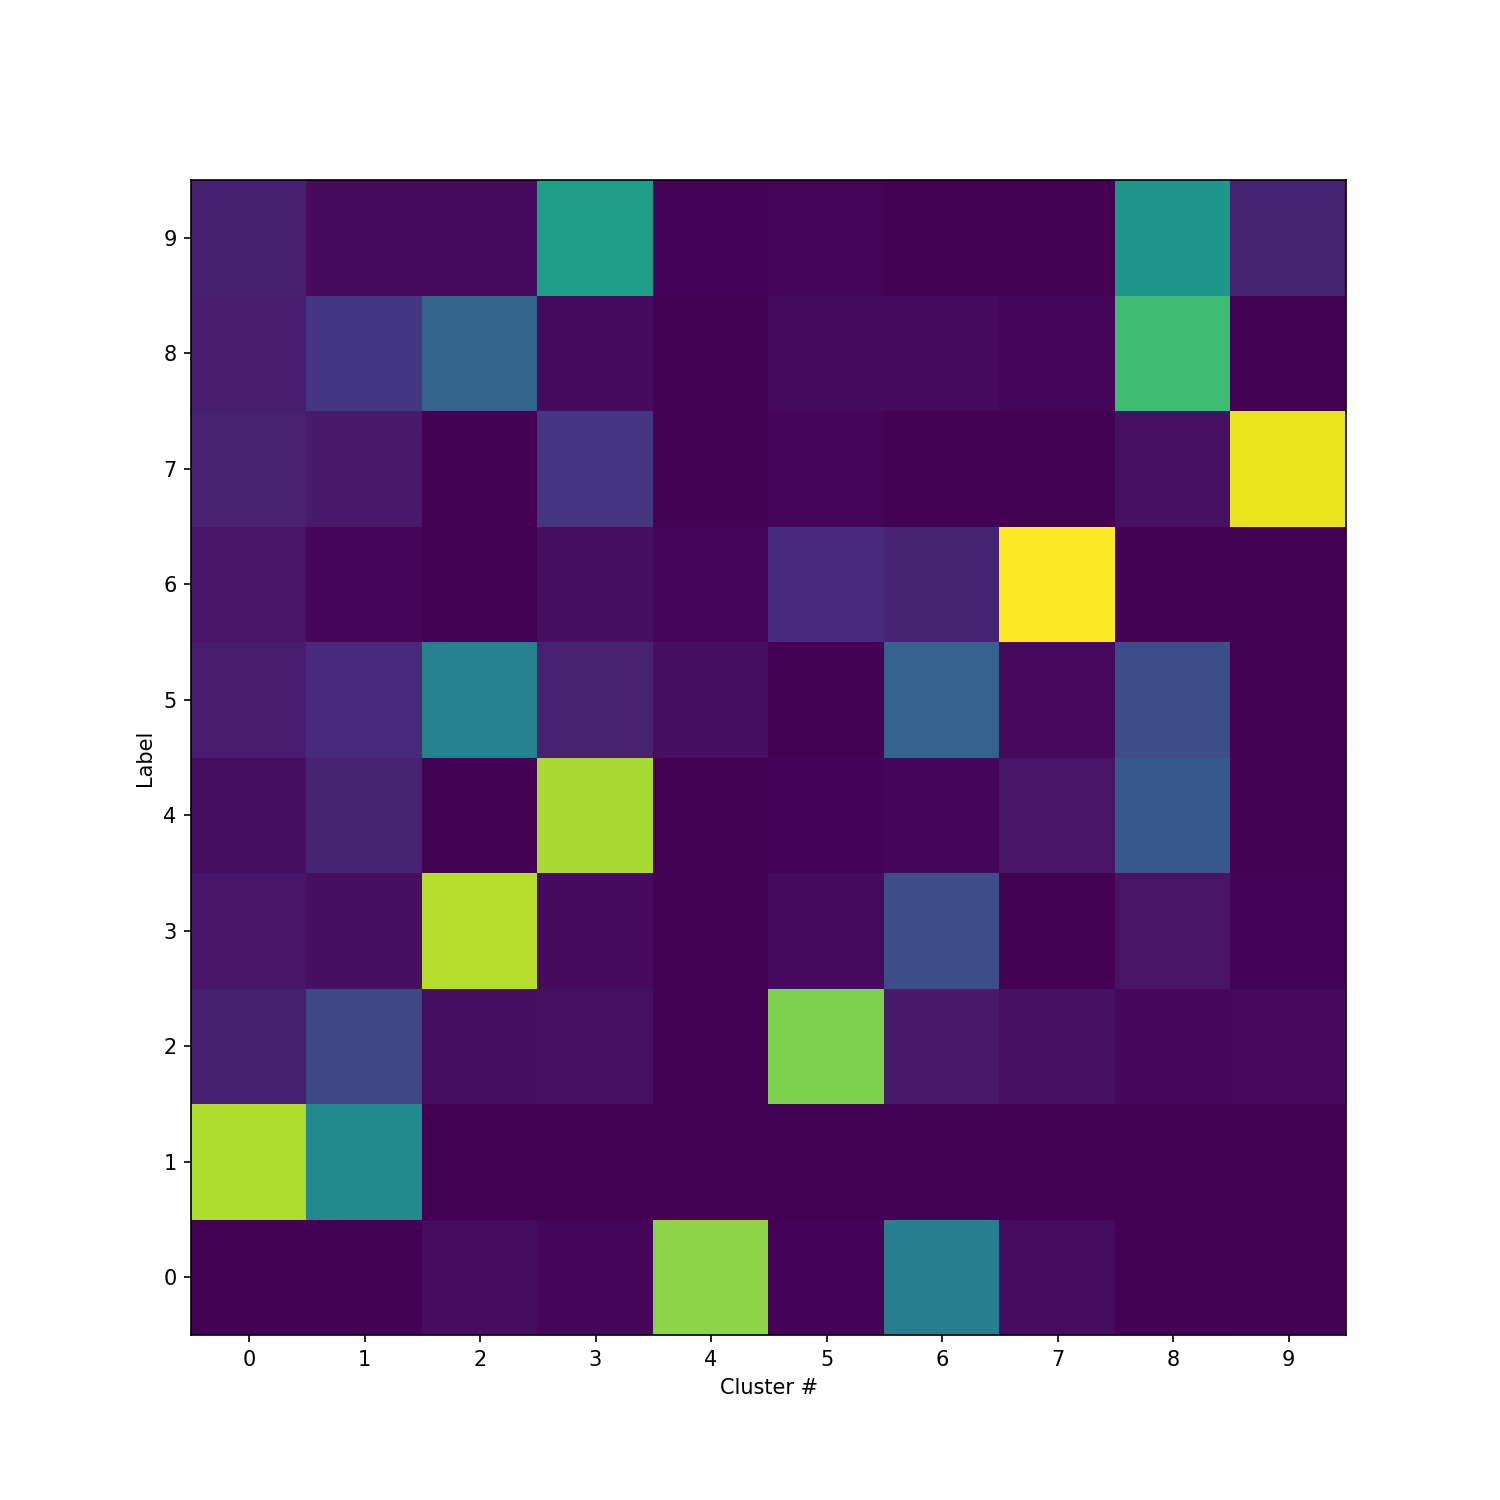

In [77]:
labels=[k.labels_[i][:6000] for i in inds]
#mat is matrix such that 
mat=np.array([np.bincount(l) for l in labels])
plt.figure(figsize=(10,10))
plt.gca().set_xticks(range(10))
plt.gca().set_yticks(range(10))
plt.gca().set_xlabel('Cluster #')
plt.gca().set_ylabel('Label')
plt.imshow(mat,origin='lower')
plt.show()

It looks like most clusters correspond quite overwhelmingly to a given label. Note though that some figures are harder to distinguish: 4 and 9, for example are both mapped to the 0 cluster. Also, 3 and 5 map to the 9th cluster. Note that we didn't divide the data to training and validation because I'm lazy.

# Neural Network

Load the `keras` mnist dataset and build a NN with one fully connected layer of 512 nodes and another fully connected softmax layer.

In [79]:
from keras.datasets import mnist as keras_mnist
(train_images, train_labels), (test_images, test_labels) = keras_mnist.load_data()
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

#The data needs to be flattened before being fed into the network (this is not a ConvNet)
train_images_1d = train_images.reshape((60000, 28 * 28))
train_images_1d = train_images_1d.astype('float32') / 255
test_images_1d = test_images.reshape((10000, 28 * 28))
test_images_1d = test_images_1d.astype('float32') / 255

from keras.utils import to_categorical #this just converts the labels to one-hot class
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
h=network.fit(train_images_1d, train_labels, epochs=5, batch_size=128)

C:\Users\Gita\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\Gita\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tens

11493376/11490434 [==============================] - 5s 0us/step
Epoch 1/5
  768/60000 [..............................] - ETA: 2:06:40 - loss: 1.6051 - acc: 0.5039

SystemError: <class 'range'> returned a result with an error set
Apply node that caused the error: Elemwise{Composite{(i0 - (i1 / (i2 + sqrt(clip(i3, i4, i5)))))}}[(0, 0)](dense_1/kernel, Dot22Scalar.0, TensorConstant{(1, 1) of 1e-07}, Elemwise{Composite{((i0 * i1) + (i2 * sqr(i3)))}}[(0, 1)].0, TensorConstant{(1, 1) of 0.0}, TensorConstant{(1, 1) of inf})
Toposort index: 64
Inputs types: [TensorType(float32, matrix), TensorType(float32, matrix), TensorType(float32, (True, True)), TensorType(float32, matrix), TensorType(float32, (True, True)), TensorType(float32, (True, True))]
Inputs shapes: [(784, 512), (784, 512), (1, 1), (784, 512), (1, 1), (1, 1)]
Inputs strides: [(2048, 4), (2048, 4), (4, 4), (2048, 4), (4, 4), (4, 4)]
Inputs values: ['not shown', 'not shown', array([[1.e-07]], dtype=float32), 'not shown', array([[0.]], dtype=float32), array([[inf]], dtype=float32)]
Outputs clients: [['output']]

HINT: Re-running with most Theano optimization disabled could give you a back-trace of when this node was created. This can be done with by setting the Theano flag 'optimizer=fast_compile'. If that does not work, Theano optimizations can be disabled with 'optimizer=None'.
HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.

Construct again the matrix that shows how many of each label were classified as which label

In [ ]:
predictions=np.argmax(network.predict(test_images_1d),axis=1)
keras_mat=np.zeros([10,10],dtype='i')
label_v=test_labels.argmax(axis=1)
for i in range(10):
    for j in range(10):
        keras_mat[i,j]=np.bitwise_and(label_v==i , predictions==j).sum()
plt.figure()
plt.imshow(keras_mat,origin='lower')
plt.show()

This is much better, as you can clearly see. Note, though, that the error in the training set is lower than that of the validation set, a sign of overfitting:

In [ ]:
print "Train loss is %f and accuracy is %f"      %  tuple(network.evaluate(train_images_1d, train_labels, verbose=0))
print "Validation loss is %f and accuracy is %f" %  tuple(network.evaluate(test_images_1d, test_labels, verbose=0))